In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# reading in the data file
df = pd.read_excel('TechImpactCensusData.xlsx')

In [2]:
# limiting factor lists
cloud_factor = ['T2E36R01','T2E36R02','T2E36R03','T2E36R04','T2E36R05','T2E36R06','T2E36R07','T2E36R08']
ai_factor = ['T1E36R01','T1E36R02','T1E36R03','T1E36R04','T1E36R05','T1E36R06','T1E36R07','T1E36R08']
sftwr_factor = ['T3E36R01','T3E36R02','T3E36R03','T3E36R04','T3E36R05','T3E36R06','T3E36R07','T3E36R08']

In [3]:
# health dataframes filtered by technologies
cbhealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
cbhealth = cbhealth[cbhealth.FACTORS_P.isin(cloud_factor)]

aihealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
aihealth = aihealth[aihealth.FACTORS_P.isin(ai_factor)]

swhealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
swhealth = swhealth[swhealth.FACTORS_P.isin(sftwr_factor)]

In [4]:
# health cloud-based 
labels = list(cbhealth['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital']

cbhealth['FACTORS_P_LABEL'] = cbhealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
cbhealth = cbhealth[['FACTORS_P_LABEL','FIRMPDEMP']]
cbhealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [5]:
# health ai
labels = list(aihealth['FACTORS_P_LABEL'])

aihealth['FACTORS_P_LABEL'] = aihealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
aihealth = aihealth[['FACTORS_P_LABEL','FIRMPDEMP']]
aihealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [6]:
# health software
labels = list(swhealth['FACTORS_P_LABEL'])

swhealth['FACTORS_P_LABEL'] = swhealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
swhealth = swhealth[['FACTORS_P_LABEL','FIRMPDEMP']]
swhealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [7]:
# recombining health data into one dataframe
health = cbhealth
health.columns = ['Cloud-Based Technology']
health['Specialized Software'] = swhealth['FIRMPDEMP']
health['AI Technology'] = aihealth['FIRMPDEMP']

In [8]:
## found that too expensive >> than other limiting factors
# graph_labels = ['Too\nexpensive','Tech not\nmature','Improper\nData','Unreliable\nData','Insufficient\nTalent','Laws and\nRegulations','Security\nConcerns','Insufficient\nCapital']
# color_list = ['cornflowerblue','lightgreen','silver']
# health.plot(kind='bar',color=color_list,figsize=(12,5),title='Health Technology Broken Down by Limiting Factor',xlabel='Limiting Factor',ylabel='Count of Health Firms')

In [9]:
# dropped 'Too expensive' index to see distribution of other factors
h1 = health.drop(['Too expensive'],axis=0)
h1_sorted = h1.sort_values(by='Cloud-Based Technology',ascending=False)

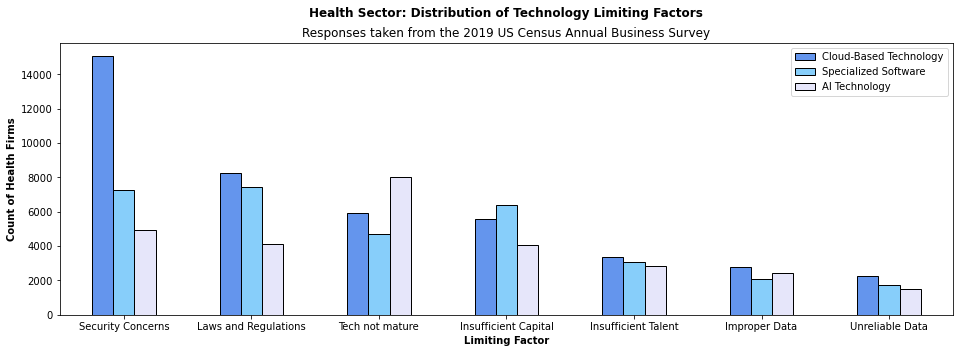

In [10]:
# plotting limiting factors in health sector
color_list = ['cornflowerblue','lightskyblue','lavender']
h1_sorted.plot(kind='bar',color=color_list,edgecolor = "black",figsize=(16,5),rot=0,title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('Health Sector: Distribution of Technology Limiting Factors',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Count of Health Firms',fontweight='bold')
plt.show()

In [11]:
# comparing 'Too expensive' to 'Other' [grouped factors]
group = ['Too expensive','Other','Other','Other','Other','Other','Other','Other']
health['Group'] = group
h2 = health.groupby('Group').sum()
h2['All Technologies'] = h2.sum(axis=1)

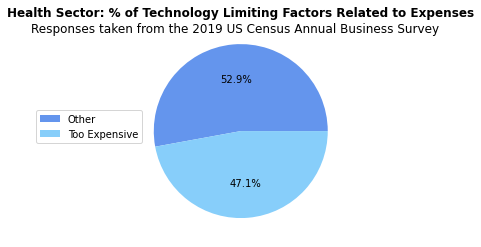

In [12]:
# % Too Expensive for health sector
pie_labels = ['Other','Too Expensive']
pie_colors = ['cornflowerblue','lightskyblue']
plt.pie(h2['All Technologies'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Health Sector: % of Technology Limiting Factors Related to Expenses',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))

In [13]:
# finance dataframes filtered by technologies
cbfin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
cbfin = cbfin[cbfin.FACTORS_P.isin(cloud_factor)]

aifin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
aifin = aifin[aifin.FACTORS_P.isin(ai_factor)]

swfin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
swfin = swfin[swfin.FACTORS_P.isin(sftwr_factor)]

In [14]:
labels = list(cbfin['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital']

cbfin['FACTORS_P_LABEL'] = cbfin['FACTORS_P_LABEL'].replace(labels,replace_labels)
cbfin = cbfin[['FACTORS_P_LABEL','FIRMPDEMP']]
cbfin.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(aifin['FACTORS_P_LABEL'])

aifin['FACTORS_P_LABEL'] = aifin['FACTORS_P_LABEL'].replace(labels,replace_labels)
aifin = aifin[['FACTORS_P_LABEL','FIRMPDEMP']]
aifin.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(swfin['FACTORS_P_LABEL'])

swfin['FACTORS_P_LABEL'] = swfin['FACTORS_P_LABEL'].replace(labels,replace_labels)
swfin = swfin[['FACTORS_P_LABEL','FIRMPDEMP']]
swfin.set_index(['FACTORS_P_LABEL'],inplace=True)

In [15]:
fin = cbfin
fin.columns = ['Cloud-Based Technology']
fin['Specialized Software'] = swfin['FIRMPDEMP']
fin['AI Technology'] = aifin['FIRMPDEMP']

In [16]:
f1 = fin.drop(['Too expensive'],axis=0)
f1_sorted = f1.sort_values(by='Cloud-Based Technology',ascending=False)

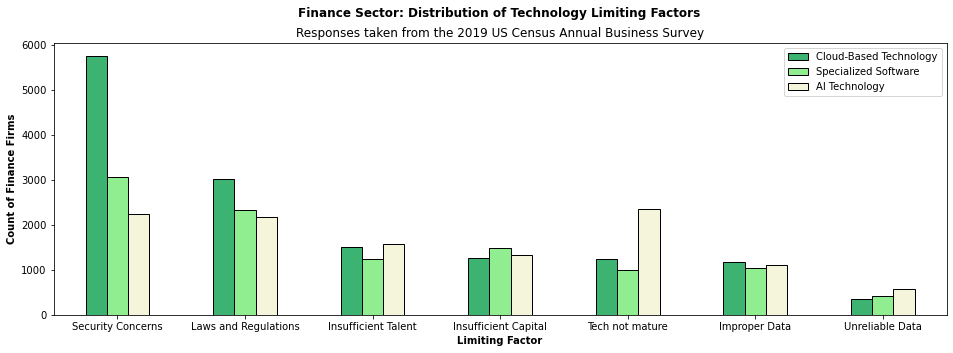

In [17]:
color_list = ['mediumseagreen','lightgreen','beige']
f1_sorted.plot(kind='bar',color=color_list,edgecolor = "black",figsize=(16,5),rot=0,title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('Finance Sector: Distribution of Technology Limiting Factors',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Count of Finance Firms',fontweight='bold')
plt.show()

In [18]:
# comparing 'Too expensive' to 'Other' [grouped factors]
group = ['Too expensive','Other','Other','Other','Other','Other','Other','Other']
fin['Group'] = group
f2 = fin.groupby('Group').sum()
f2['All Technologies'] = f2.sum(axis=1)

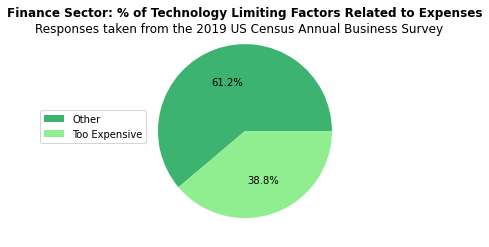

In [19]:
# % Too Expensive for finance sector
pie_labels = ['Other','Too Expensive']
pie_colors = ['mediumseagreen','lightgreen']
plt.pie(f2['All Technologies'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Finance Sector: % of Technology Limiting Factors Related to Expenses',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))

In [20]:
## exploring the need for action -- scale of limiting factors vs. tech not applicable + no limiting factors

In [21]:
cloud_factor = ['T2E36R01','T2E36R02','T2E36R03','T2E36R04','T2E36R05','T2E36R06','T2E36R07','T2E36R08','T2E36R09','T2E36R10']
ai_factor = ['T1E36R01','T1E36R02','T1E36R03','T1E36R04','T1E36R05','T1E36R06','T1E36R07','T1E36R08','T1E36R09','T1E36R10']
sftwr_factor = ['T3E36R01','T3E36R02','T3E36R03','T3E36R04','T3E36R05','T3E36R06','T3E36R07','T3E36R08','T3E36R09','T3E36R10']

In [22]:
swhealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
swhealth = swhealth[swhealth.FACTORS_P.isin(sftwr_factor)]

In [23]:
labels = list(swhealth['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital','Tech not Applicable','No Limiting Factors']
groupby_labels = ['Other','Other','Other','Other','Other','Other','Other','Other','Tech not Applicable','No Limiting Factors']


swhealth['FACTORS_P_LABEL'] = swhealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
swhealth = swhealth[['FACTORS_P_LABEL','FIRMPDEMP']]
swhealth.set_index(['FACTORS_P_LABEL'],inplace=True)
swhealth['Group'] = groupby_labels
#swhealth

In [24]:
swhealth = swhealth.groupby('Group').sum()
swhealth = swhealth.sort_values('FIRMPDEMP',ascending=False)
#swhealth

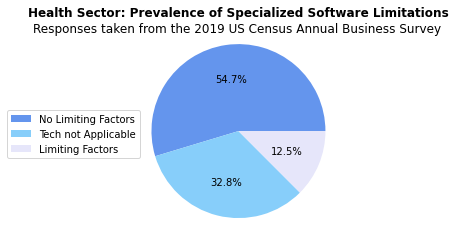

In [25]:
pie_labels = ['No Limiting Factors','Tech not Applicable','Limiting Factors']
pie_colors = ['cornflowerblue','lightskyblue','lavender']
plt.pie(swhealth['FIRMPDEMP'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Health Sector: Prevalence of Specialized Software Limitations',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',x=.51,y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))

In [26]:
swfin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
swfin = swfin[swfin.FACTORS_P.isin(sftwr_factor)]

labels = list(swfin['FACTORS_P_LABEL'])

swfin['FACTORS_P_LABEL'] = swfin['FACTORS_P_LABEL'].replace(labels,replace_labels)
swfin = swfin[['FACTORS_P_LABEL','FIRMPDEMP']]
swfin.set_index(['FACTORS_P_LABEL'],inplace=True)
swfin['Group'] = groupby_labels
#swfin

In [27]:
swfin = swfin.groupby('Group').sum()
swfin = swfin.sort_values('FIRMPDEMP',ascending=False)
#swfin

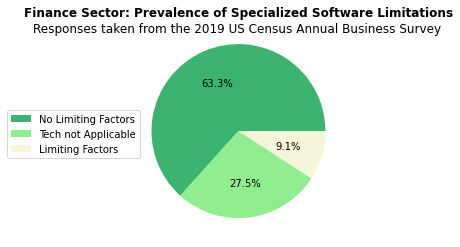

In [28]:
pie_labels = ['No Limiting Factors','Tech not Applicable','Limiting Factors']
pie_colors = ['mediumseagreen','lightgreen','beige']
plt.pie(swfin['FIRMPDEMP'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Finance Sector: Prevalence of Specialized Software Limitations',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',x=.51,y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))